# **Importing and Installing Tools**

In [ ]:
!pip install --upgrade geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.9 MB/s 
     |████████████████████████████████| 16.6 MB 86 kB/s 
     |████████████████████████████████| 7.8 MB 21.6 MB/s 


In [ ]:
!pip install --upgrade pysal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 220 kB 6.4 MB/s 
     |████████████████████████████████| 55 kB 1.5 MB/s 
     |████████████████████████████████| 41 kB 227 kB/s 
     |████████████████████████████████| 147 kB 41.8 MB/s 
     |████████████████████████████████| 2.4 MB 32.5 MB/s 
     |████████████████████████████████| 116 kB 17.7 MB/s 
     |████████████████████████████████| 84 kB 1.1 MB/s 
     |████████████████████████████████| 243 kB 34.0 MB/s 
     |████████████████████████████████| 5.7 MB 17.3 MB/s 
     |████████████████████████████████| 60 kB 2.4 MB/s 
     |████████████████████████████████| 46 kB 2.8 MB/s 
     |████████████████████████████████| 179 kB 33.0 MB/s 
     |████████████████████████████████| 2.2 MB 37.8 MB/s 
     |████████████████████████████████| 78 kB 4.5 MB/s 
     |████████████████████████████████| 183 kB 38.1 MB/s 
     |████████████████████████████████| 1.0 

In [ ]:
!pip install splot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install esda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing EDA and Plotting Libraries
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix
import numpy as np
from scipy import stats
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
# plots should appear in the notebook
%matplotlib inline 
import seaborn as sns

# Visualization themes & styles
plt.style.use('ggplot')
sns.set_theme(style = "darkgrid", palette = "pastel")

# Statistical Analysis Libraries
from scipy import stats
from scipy.stats import pearsonr
import statsmodels.formula.api as sm
import statsmodels.api as sm

# Importing Spatial Analysis Libraries
import geopandas as gpd
from pysal.model import spreg
from pysal.lib import weights
import splot
from esda.moran import Moran, Moran_Local
import esda
import libpysal as lps
from libpysal.weights.contiguity import Queen
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster,plot_moran_simulation

# Regression Models for Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

# Regression Model Tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline

# Regression Model Tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Connect Google Drive to Notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Imports - NDVI Data**

In [ ]:
# Import Dissemination Area Boundary Data
peel_da_boundaries = gpd.read_file('/content/drive/MyDrive/GGR442_Project3_Data/2016_Census_DA.geojson')
peel_da_boundaries.head(10)

,OBJECTID,DAUID,PRUID,PRNAME,CDUID,CDNAME,CDTYPE,CCSUID,CCSNAME,CSDUID,...,Mobility5_Movers,Mobility5_Non_migrants,Mobility5_Migrants,Mobility5_Internal_migrants,Mobility5_Intraprovincial_migra,Mobility5_Interprovincial_migra,Mobility5_External_migrants,SHAPE_Length,SHAPE_Area,geometry
0,4055,35211603,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,315.0,105.0,210.0,210.0,210.0,0.0,0.0,0.202727,0.001740,"MULTIPOLYGON (((-79.83891 43.95114, -79.83870 ..."
1,4067,35211604,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,230.0,110.0,115.0,115.0,105.0,10.0,0.0,0.253848,0.003098,"MULTIPOLYGON (((-79.87936 43.93099, -79.87852 ..."
2,4092,35210014,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,205.0,45.0,155.0,155.0,145.0,10.0,0.0,0.152793,0.001292,"MULTIPOLYGON (((-79.85779 43.79315, -79.85695 ..."
3,4093,35210015,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,115.0,45.0,70.0,60.0,55.0,10.0,15.0,0.171581,0.001747,"MULTIPOLYGON (((-79.91566 43.80082, -79.91528 ..."
4,4094,35210017,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,205.0,55.0,150.0,145.0,140.0,10.0,0.0,0.211042,0.002237,"MULTIPOLYGON (((-79.93596 43.71941, -79.93628 ..."
5,4095,35211615,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,255.0,55.0,200.0,200.0,205.0,0.0,10.0,0.275134,0.003125,"MULTIPOLYGON (((-79.91559 43.80088, -79.91566 ..."
6,4096,35211616,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,85.0,35.0,50.0,45.0,45.0,0.0,10.0,0.302833,0.002844,"MULTIPOLYGON (((-79.92523 43.86091, -79.92387 ..."
7,4097,35211617,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,130.0,10.0,125.0,125.0,125.0,0.0,0.0,0.112284,0.000470,"MULTIPOLYGON (((-79.97298 43.86101, -79.97063 ..."
8,4098,35211618,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,100.0,0.0,95.0,95.0,100.0,0.0,0.0,0.096395,0.000463,"MULTIPOLYGON (((-79.99101 43.86462, -79.99201 ..."
9,4099,35211619,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,85.0,10.0,75.0,75.0,75.0,0.0,0.0,0.096173,0.000476,"MULTIPOLYGON (((-80.00640 43.85145, -80.00704 ..."


In [ ]:
# Description of Peel 2016 DA Boundaries 
print(peel_da_boundaries.shape)
peel_da_boundaries.dtypes

(1650, 314)


OBJECTID                              int64
DAUID                                object
PRUID                                object
PRNAME                               object
CDUID                                object
                                     ...   
Mobility5_Interprovincial_migra     float64
Mobility5_External_migrants         float64
SHAPE_Length                        float64
SHAPE_Area                          float64
geometry                           geometry
Length: 314, dtype: object

In [ ]:
peel_da_boundaries['DAUID'] = pd.to_numeric(peel_da_boundaries['DAUID'])
peel_da_boundaries.dtypes

OBJECTID                              int64
DAUID                                 int64
PRUID                                object
PRNAME                               object
CDUID                                object
                                     ...   
Mobility5_Interprovincial_migra     float64
Mobility5_External_migrants         float64
SHAPE_Length                        float64
SHAPE_Area                          float64
geometry                           geometry
Length: 314, dtype: object

In [ ]:
# Import 2016 NDVI Data
ndvi_2016_data_df = pd.read_csv('/content/drive/MyDrive/GEE output/landsat8_ndvi_Peel_2016.csv')
ndvi_2016_data_df.head(10)

# Drop the useless geometry column
ndvi_2016_data_df = ndvi_2016_data_df.drop(['.geo', 'system:index'], axis = 1)
ndvi_2016_data_df.head(5)

,ADAUID,CCSNAME,CCSUID,CDNAME,CDTYPE,CDUID,CMANAME,CMAPUID,CMATYPE,CMAUID,...,ERNAME,ERUID,OBJECTID,PRNAME,PRUID,SACCODE,SACTYPE,SHAPE_Area,SHAPE_Leng,mean
0,35210072,Brampton,3521010,Peel,RM,3521,Toronto,35535,B,535,...,Toronto,3530,6590,Ontario,35,535,1,-1.305361e+06,5346.305941,0.230162
1,35210061,Brampton,3521010,Peel,RM,3521,Toronto,35535,B,535,...,Toronto,3530,8810,Ontario,35,535,1,-2.666023e+07,27683.298821,0.120505
2,35210105,Brampton,3521010,Peel,RM,3521,Toronto,35535,B,535,...,Toronto,3530,7565,Ontario,35,535,1,-1.045216e+06,5171.342938,0.126658
3,35210071,Brampton,3521010,Peel,RM,3521,Toronto,35535,B,535,...,Toronto,3530,6484,Ontario,35,535,1,-8.182174e+05,3586.517864,0.116703
4,35210022,Brampton,3521010,Peel,RM,3521,Toronto,35535,B,535,...,Toronto,3530,6043,Ontario,35,535,1,-2.699952e+05,3585.228070,0.135235


In [ ]:
# Description of Peel 2016 NDVI Data
print(ndvi_2016_data_df.shape)
ndvi_2016_data_df.dtypes

(1650, 29)


ADAUID          int64
CCSNAME        object
CCSUID          int64
CDNAME         object
CDTYPE         object
CDUID           int64
CMANAME        object
CMAPUID         int64
CMATYPE        object
CMAUID          int64
CSDNAME        object
CSDTYPE        object
CSDUID          int64
CTNAME        float64
CTUID         float64
DAPOP16       float64
DATDWEL16     float64
DAUID           int64
DAURDWEL16    float64
ERNAME         object
ERUID           int64
OBJECTID        int64
PRNAME         object
PRUID           int64
SACCODE         int64
SACTYPE         int64
SHAPE_Area    float64
SHAPE_Leng    float64
mean          float64
dtype: object

In [ ]:
# Merge Peel Boundary Files to 2016 NDVI Air Pollution
peel_ndvi_2016_df = peel_da_boundaries.merge(ndvi_2016_data_df, on = 'DAUID')
peel_ndvi_2016_df

,OBJECTID_x,DAUID,PRUID_x,PRNAME_x,CDUID_x,CDNAME_x,CDTYPE_x,CCSUID_x,CCSNAME_x,CSDUID_x,...,ERNAME_y,ERUID_y,OBJECTID_y,PRNAME_y,PRUID_y,SACCODE_y,SACTYPE_y,SHAPE_Area_y,SHAPE_Leng,mean
0,4055,35211603,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,Toronto,3530,4055,Ontario,35,535,1,-2.995463e+07,25568.578902,0.368592
1,4067,35211604,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,Toronto,3530,4067,Ontario,35,535,1,-5.331006e+07,32170.972280,0.383406
2,4092,35210014,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,Toronto,3530,4092,Ontario,35,535,1,-2.217722e+07,19780.911767,0.326539
3,4093,35210015,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,Toronto,3530,4093,Ontario,35,535,1,-2.997819e+07,22667.200689,0.317828
4,4094,35210017,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,Toronto,3530,4094,Ontario,35,535,1,-3.837932e+07,27984.249081,0.384662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,8854,35212107,35,Ontario,3521,Peel,RM,3521010,Brampton,3521005,...,Toronto,3530,8854,Ontario,35,535,1,-2.127970e+06,10819.540553,0.332766
1646,8855,35212118,35,Ontario,3521,Peel,RM,3521010,Brampton,3521005,...,Toronto,3530,8855,Ontario,35,535,1,-1.610293e+06,6492.035172,0.175249
1647,8856,35212119,35,Ontario,3521,Peel,RM,3521010,Brampton,3521005,...,Toronto,3530,8856,Ontario,35,535,1,-1.486938e+06,8951.481010,0.177980
1648,8869,35212082,35,Ontario,3521,Peel,RM,3521010,Brampton,3521005,...,Toronto,3530,8869,Ontario,35,535,1,-6.159696e+04,1354.618399,0.213588


In [ ]:
# Ensure that geometry is retained with 2016 NO2 Data
peel_ndvi_2016_df['geometry']

0       MULTIPOLYGON (((-79.83891 43.95114, -79.83870 ...
1       MULTIPOLYGON (((-79.87936 43.93099, -79.87852 ...
2       MULTIPOLYGON (((-79.85779 43.79315, -79.85695 ...
3       MULTIPOLYGON (((-79.91566 43.80082, -79.91528 ...
4       MULTIPOLYGON (((-79.93596 43.71941, -79.93628 ...
                              ...                        
1645    MULTIPOLYGON (((-79.60224 43.51835, -79.60224 ...
1646    MULTIPOLYGON (((-79.56531 43.62646, -79.56578 ...
1647    MULTIPOLYGON (((-79.58371 43.62457, -79.58102 ...
1648    MULTIPOLYGON (((-79.59018 43.62422, -79.58925 ...
1649    MULTIPOLYGON (((-79.58636 43.62436, -79.58768 ...
Name: geometry, Length: 1650, dtype: geometry

# **Data Exploration and Visualizations - NDVI Data**

In [ ]:
# Summary Statistics of NDVI in 2016 for Peel Region
peel_ndvi_2016_df['mean'].describe()

count    1650.000000
mean        0.202053
std         0.052164
min         0.073396
25%         0.164769
50%         0.192772
75%         0.226997
max         0.398882
Name: mean, dtype: float64

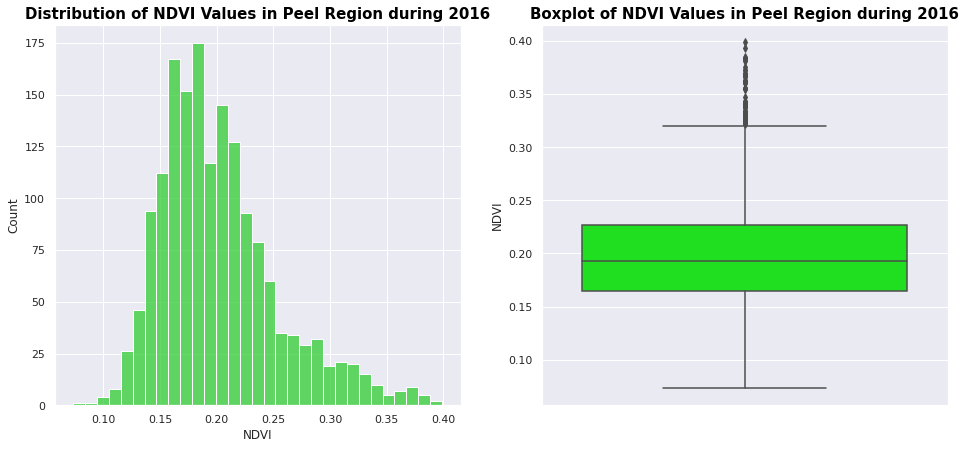

In [ ]:
# Histogram and Box Plots of NDVI in 2016 for Peel Region
fig, (ax1, ax2) = plt.subplots(nrows = 1,
                               ncols = 2,
                               figsize = (16, 7))

# Histogram for 2016 NDVI 
sns.histplot(ax = ax1, data = peel_ndvi_2016_df, x = 'mean', color = 'limegreen')
ax1.set_title('Distribution of NDVI Values in Peel Region during 2016', fontdict = {'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax1.set_xlabel("NDVI")
ax1.set_ylabel("Count");

# Boxplot for 2016 NDVI 
sns.boxplot(ax = ax2, y = peel_ndvi_2016_df['mean'], color = 'lime')
ax2.set_title('Boxplot of NDVI Values in Peel Region during 2016', fontdict = {'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax2.set_xlabel("")
ax2.set_ylabel("NDVI");

In [ ]:
# Computing Skewness and Kurtosis of NDVI variable
print("The Skewness of the NDVI Values in 2016 for Peel Region: " + str(peel_ndvi_2016_df['mean'].skew()))
print("The kurtosis of the NDVI Values in 2016 for Peel Region: " + str(peel_ndvi_2016_df['mean'].kurt()))

The Skewness of the NDVI Values in 2016 for Peel Region: 0.997817882724123
The kurtosis of the NDVI Values in 2016 for Peel Region: 1.0377717637620152


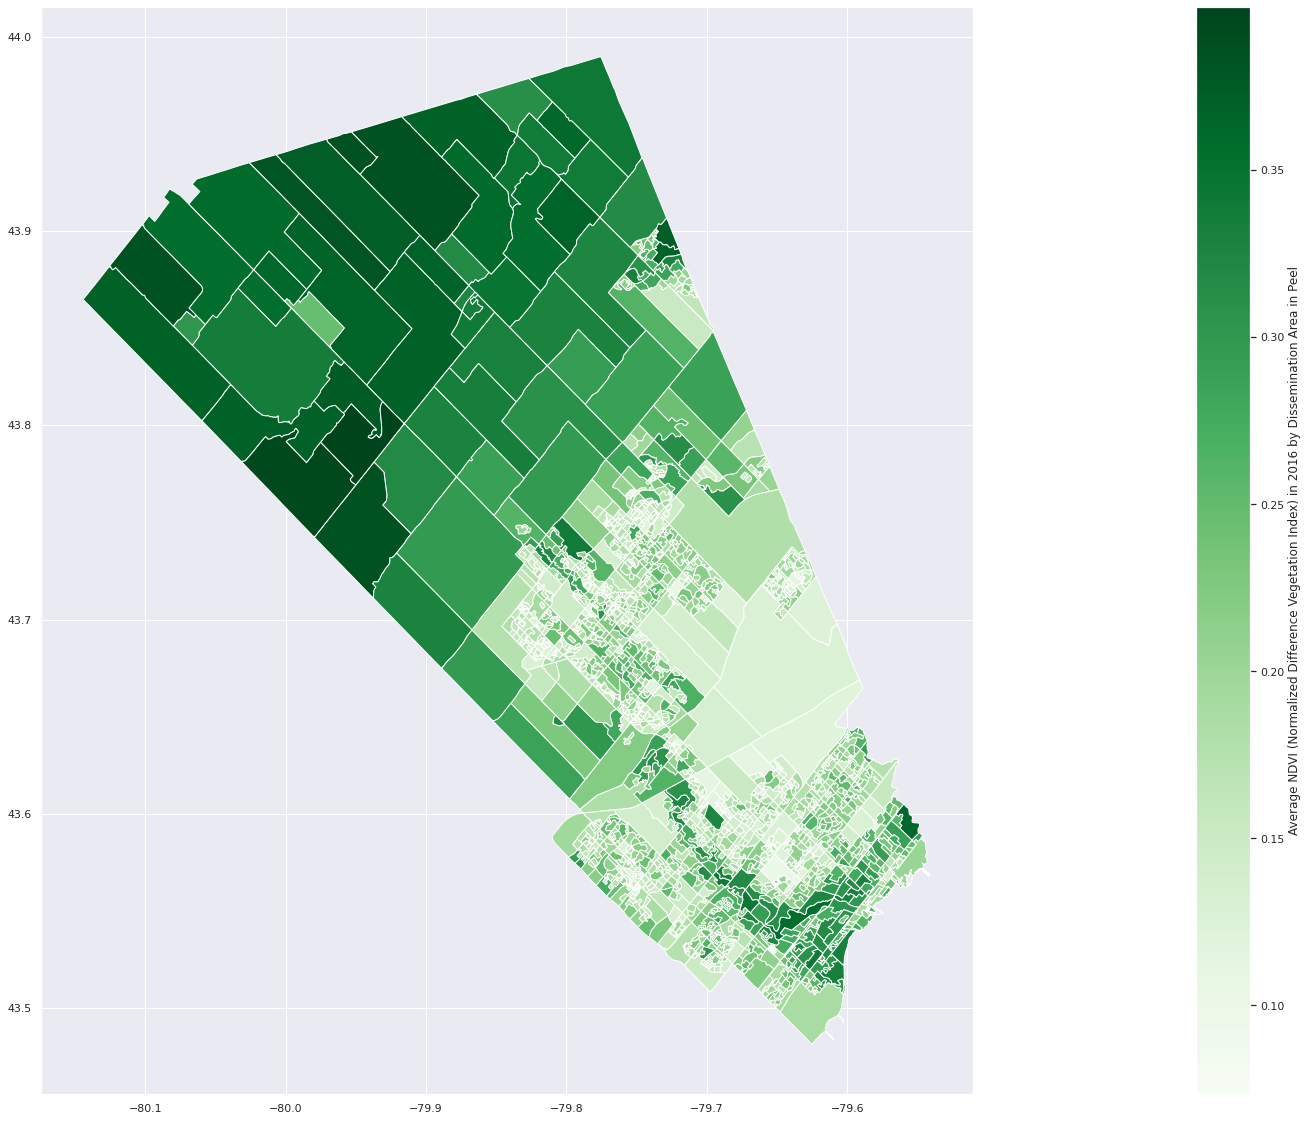

In [ ]:
# Chloropleth Map of NDVI in 2016 for Peel Region
peel_ndvi_2016_df.plot(column = "mean",
                      legend = True,
                      figsize = [80, 20],
                      legend_kwds = {'label': "Average NDVI (Normalized Difference Vegetation Index) in 2016 by Dissemination Area in Peel"},
                      cmap = "Greens");

# **Data Imports - NO$_{2}$ Data**

In [ ]:
# Import 2016 NO2 Data
no2_2016_data_df = pd.read_csv('/content/drive/MyDrive/GGR442_Project3_Data/AP_16.csv')
no2_2016_data_df.head(10)

# Drop the useless geometry column
no2_2016_data_df = no2_2016_data_df.drop('geometry', axis = 1)
no2_2016_data_df.head(5)

,DAUID,PRUID,PRNAME,CDUID,CDNAME,CDTYPE,CCSUID,CCSNAME,CSDUID,CSDNAME,...,SACCODE,SACTYPE,CMAUID,CMAPUID,CMANAME,CMATYPE,CTUID,CTNAME,ADAUID,APMean
0,35210188,35,Ontario,3521,Peel,RM,3521010,Brampton,3521010,Brampton,...,535,1,535,35535,Toronto,B,5350574.00,574.00,35210060,9.193614
1,35210189,35,Ontario,3521,Peel,RM,3521010,Brampton,3521010,Brampton,...,535,1,535,35535,Toronto,B,5350572.01,572.01,35210068,9.106378
2,35210190,35,Ontario,3521,Peel,RM,3521010,Brampton,3521010,Brampton,...,535,1,535,35535,Toronto,B,5350572.01,572.01,35210068,9.191899
3,35210191,35,Ontario,3521,Peel,RM,3521010,Brampton,3521010,Brampton,...,535,1,535,35535,Toronto,B,5350572.01,572.01,35210068,9.180195
4,35210192,35,Ontario,3521,Peel,RM,3521010,Brampton,3521010,Brampton,...,535,1,535,35535,Toronto,B,5350572.01,572.01,35210068,9.138650


In [ ]:
# Description of Peel 2016 NO2 Data
print(no2_2016_data_df.shape)
no2_2016_data_df.dtypes

(1650, 23)


DAUID        int64
PRUID        int64
PRNAME      object
CDUID        int64
CDNAME      object
CDTYPE      object
CCSUID       int64
CCSNAME     object
CSDUID       int64
CSDNAME     object
CSDTYPE     object
ERUID        int64
ERNAME      object
SACCODE      int64
SACTYPE      int64
CMAUID       int64
CMAPUID      int64
CMANAME     object
CMATYPE     object
CTUID      float64
CTNAME     float64
ADAUID       int64
APMean     float64
dtype: object

In [ ]:
# Merge Peel Boundary Files to 2016 NO2 Air Pollution
peel_no2_2016_df = peel_da_boundaries.merge(no2_2016_data_df, on = 'DAUID')
peel_no2_2016_df

,OBJECTID,DAUID,PRUID_x,PRNAME_x,CDUID_x,CDNAME_x,CDTYPE_x,CCSUID_x,CCSNAME_x,CSDUID_x,...,SACCODE_y,SACTYPE_y,CMAUID_y,CMAPUID_y,CMANAME_y,CMATYPE_y,CTUID_y,CTNAME_y,ADAUID_y,APMean
0,4055,35211603,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,535,1,535,35535,Toronto,B,5350585.07,585.07,35210001,3.485749
1,4067,35211604,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,535,1,535,35535,Toronto,B,5350585.07,585.07,35210001,3.391727
2,4092,35210014,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,535,1,535,35535,Toronto,B,5350586.01,586.01,35210009,4.349299
3,4093,35210015,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,535,1,535,35535,Toronto,B,5350586.02,586.02,35210009,4.382483
4,4094,35210017,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,535,1,535,35535,Toronto,B,5350586.02,586.02,35210009,4.400571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,8854,35212107,35,Ontario,3521,Peel,RM,3521010,Brampton,3521005,...,535,1,535,35535,Toronto,B,5350501.02,501.02,35210151,8.945420
1646,8855,35212118,35,Ontario,3521,Peel,RM,3521010,Brampton,3521005,...,535,1,535,35535,Toronto,B,5350525.02,525.02,35210079,13.901781
1647,8856,35212119,35,Ontario,3521,Peel,RM,3521010,Brampton,3521005,...,535,1,535,35535,Toronto,B,5350525.02,525.02,35210079,13.989701
1648,8869,35212082,35,Ontario,3521,Peel,RM,3521010,Brampton,3521005,...,535,1,535,35535,Toronto,B,5350526.02,526.02,35210073,11.725460


In [ ]:
# Ensure that geometry is retained with 2016 NO2 Data
peel_no2_2016_df['geometry']

0       MULTIPOLYGON (((-79.83891 43.95114, -79.83870 ...
1       MULTIPOLYGON (((-79.87936 43.93099, -79.87852 ...
2       MULTIPOLYGON (((-79.85779 43.79315, -79.85695 ...
3       MULTIPOLYGON (((-79.91566 43.80082, -79.91528 ...
4       MULTIPOLYGON (((-79.93596 43.71941, -79.93628 ...
                              ...                        
1645    MULTIPOLYGON (((-79.60224 43.51835, -79.60224 ...
1646    MULTIPOLYGON (((-79.56531 43.62646, -79.56578 ...
1647    MULTIPOLYGON (((-79.58371 43.62457, -79.58102 ...
1648    MULTIPOLYGON (((-79.59018 43.62422, -79.58925 ...
1649    MULTIPOLYGON (((-79.58636 43.62436, -79.58768 ...
Name: geometry, Length: 1650, dtype: geometry

# **Data Exploration and Visualizations - NO$_{2}$ Data**

In [ ]:
# Summary Statistics of NO2 in 2016 for Peel Region
peel_no2_2016_df['APMean'].describe()

count    1650.000000
mean        9.488795
std         2.093434
min         3.257591
25%         8.429674
50%         9.643830
75%        10.800309
max        16.607960
Name: APMean, dtype: float64

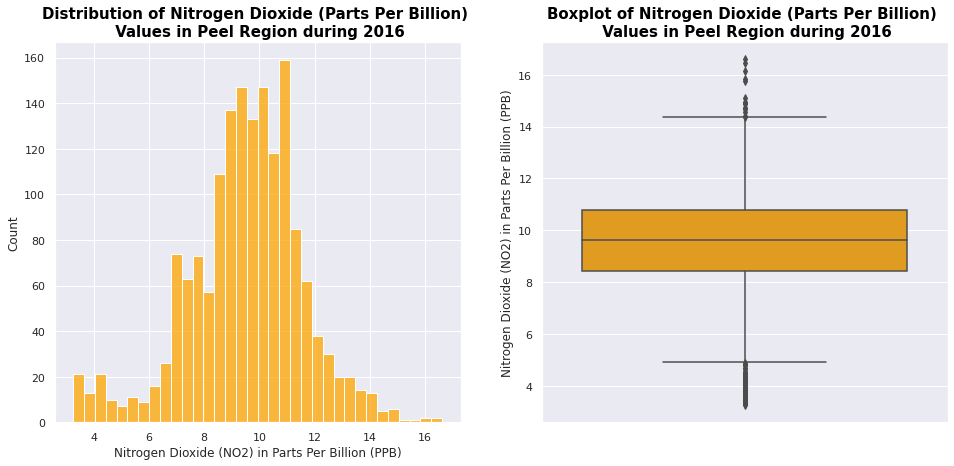

In [ ]:
# Histogram and Box Plots of NO2 in 2016 for Peel Region
fig, (ax1, ax2) = plt.subplots(nrows = 1,
                               ncols = 2,
                               figsize = (16, 7))

# Histogram for 2016 NO2
sns.histplot(ax = ax1, data = peel_no2_2016_df, x = 'APMean', color = 'orange')
ax1.set_title('Distribution of Nitrogen Dioxide (Parts Per Billion) \n Values in Peel Region during 2016', fontdict = {'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax1.set_xlabel("Nitrogen Dioxide (NO2) in Parts Per Billion (PPB)")
ax1.set_ylabel("Count");

# Boxplot for 2016 NO2
sns.boxplot(ax = ax2, y = peel_no2_2016_df['APMean'], color = 'orange')
ax2.set_title('Boxplot of Nitrogen Dioxide (Parts Per Billion) \n Values in Peel Region during 2016', fontdict = {'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax2.set_xlabel("")
ax2.set_ylabel("Nitrogen Dioxide (NO2) in Parts Per Billion (PPB)");

In [ ]:
# Computing Skewness and Kurtosis of Nitrogen Dioxide variable
print("The Skewness of the Nitrogen Dioxide Values in 2016 for Peel Region: " + str(peel_no2_2016_df['APMean'].skew()))
print("The kurtosis of the Nitrogen Dioxide Values in 2016 for Peel Region: " + str(peel_no2_2016_df['APMean'].kurt()))

The Skewness of the Nitrogen Dioxide Values in 2016 for Peel Region: -0.3979512565723235
The kurtosis of the Nitrogen Dioxide Values in 2016 for Peel Region: 0.8472288476434335


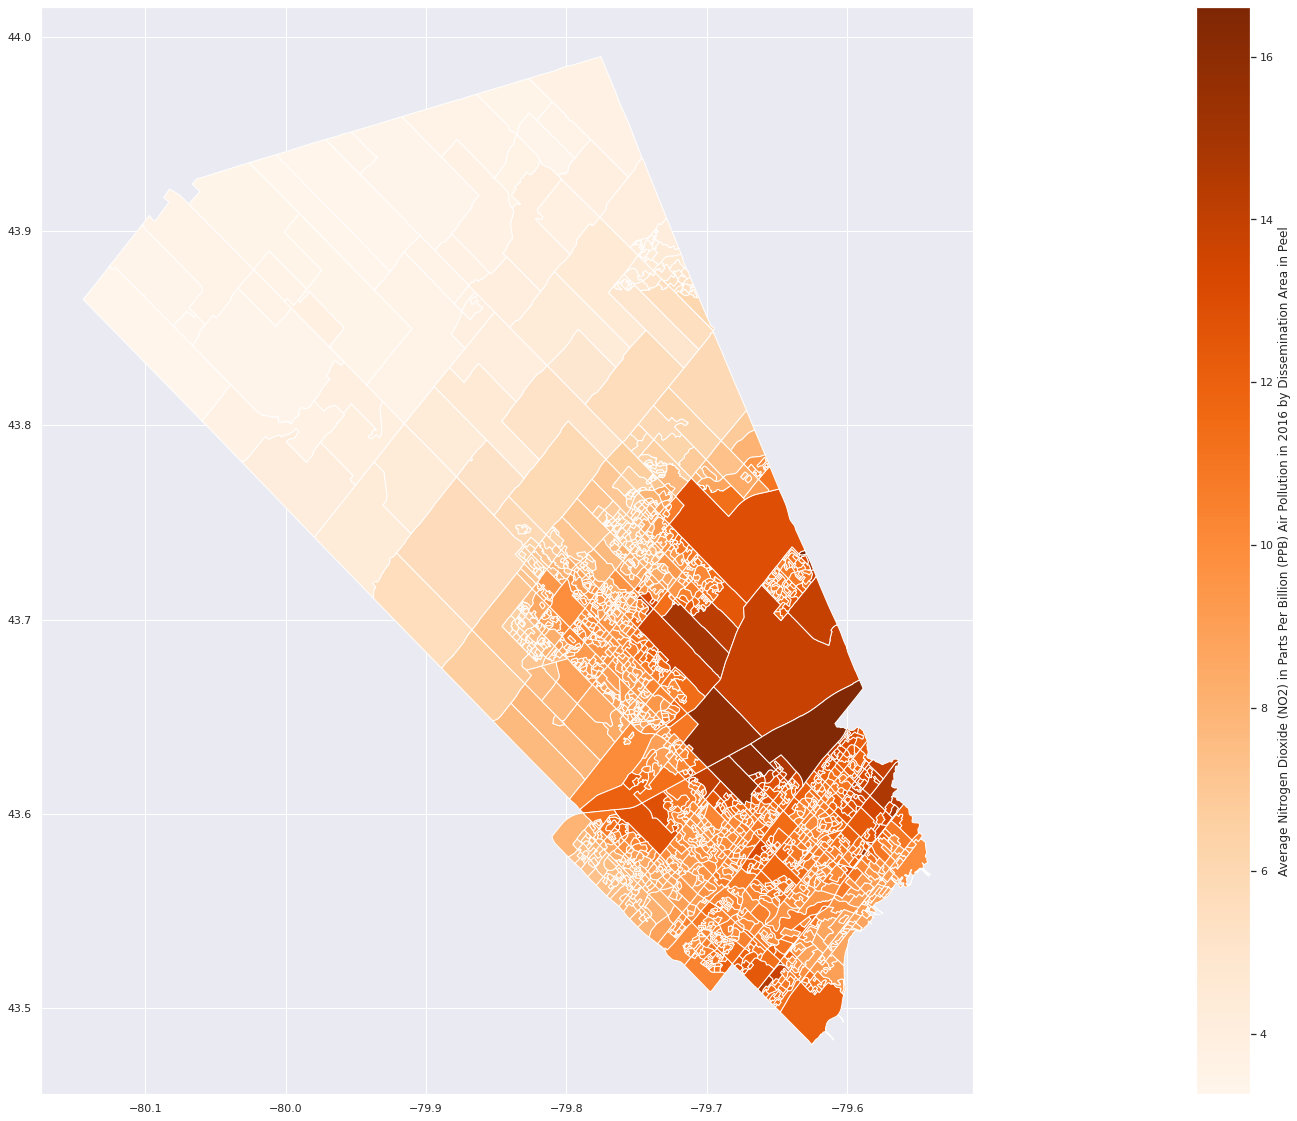

In [ ]:
# Chloropleth Map of NO2 Air Pollution in 2016 for Peel Region
peel_no2_2016_df.plot(column = "APMean",
                      legend = True,
                      figsize = [80, 20],
                      legend_kwds = {'label': "Average Nitrogen Dioxide (NO2) in Parts Per Billion (PPB) Air Pollution in 2016 by Dissemination Area in Peel"},
                      cmap = "Oranges");

# **Data Merging - Merging NO$_{2}$ and NDVI Data**

In [ ]:
# Merge 2016 Pollutant and NDVI Data
peel_ndvi_2016_relevant_info_df = peel_ndvi_2016_df[['DAUID', 'mean']]
peel_ndvi_2016_relevant_info_df.head(5)
peel_2016_df = peel_no2_2016_df.merge(peel_ndvi_2016_relevant_info_df, on = 'DAUID')
peel_2016_df.head(5)

,OBJECTID,DAUID,PRUID_x,PRNAME_x,CDUID_x,CDNAME_x,CDTYPE_x,CCSUID_x,CCSNAME_x,CSDUID_x,...,SACTYPE_y,CMAUID_y,CMAPUID_y,CMANAME_y,CMATYPE_y,CTUID_y,CTNAME_y,ADAUID_y,APMean,mean
0,4055,35211603,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,1,535,35535,Toronto,B,5350585.07,585.07,35210001,3.485749,0.368592
1,4067,35211604,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,1,535,35535,Toronto,B,5350585.07,585.07,35210001,3.391727,0.383406
2,4092,35210014,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,1,535,35535,Toronto,B,5350586.01,586.01,35210009,4.349299,0.326539
3,4093,35210015,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,1,535,35535,Toronto,B,5350586.02,586.02,35210009,4.382483,0.317828
4,4094,35210017,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,1,535,35535,Toronto,B,5350586.02,586.02,35210009,4.400571,0.384662


In [ ]:
# Inspect Accuracy of Merge
peel_2016_df[peel_2016_df['DAUID'] == 35212104]

,OBJECTID,DAUID,PRUID_x,PRNAME_x,CDUID_x,CDNAME_x,CDTYPE_x,CCSUID_x,CCSNAME_x,CSDUID_x,...,SACTYPE_y,CMAUID_y,CMAPUID_y,CMANAME_y,CMATYPE_y,CTUID_y,CTNAME_y,ADAUID_y,APMean,mean
765,6590,35212104,35,Ontario,3521,Peel,RM,3521010,Brampton,3521010,...,1,535,35535,Toronto,B,5350572.09,572.09,35210072,9.014729,0.230162


# **Correlation Analysis**

In [ ]:
# Pearson's Correlation Test for 2016 NDVI and 2016 NO2
stat, p = pearsonr(peel_ndvi_2016_df['mean'], peel_no2_2016_df['APMean'])
print('stat=%.10f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Retain the null hypothesis because there may not exist a linear relationship between the two variables (independence).')
else:
    print('Reject the null hypothesis because there likely exists a linear relationship between the two variables (dependence).')

stat=-0.2765543921, p=0.0000000000
Reject the null hypothesis because there likely exists a linear relationship between the two variables (dependence).


# **Data Preprocessing for Linear Modeling**

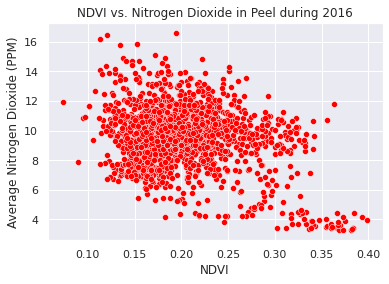

In [ ]:
# Scatter Plot of NDVI vs. Nitrogen Dioxide in Peel during 2016
ax = sns.scatterplot(data = peel_2016_df, x = 'mean', y = 'APMean', color = 'red');
plt.xlabel("NDVI")
plt.ylabel("Average Nitrogen Dioxide (PPM)")
plt.title("NDVI vs. Nitrogen Dioxide in Peel during 2016") 
plt.show();

In [ ]:
# Split the data into X and y
X = peel_2016_df['mean']

y = peel_2016_df['APMean']

# **Linear Modeling**

In [ ]:
# Acquire Linear Regression Model Accuracy with NumPy
res = stats.linregress(X, y)
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 0.065153


In [ ]:
# OLS Linear Model with 2011 Data
baseline_sp_ols_reg = spreg.OLS(peel_2016_df[['APMean']].values, peel_2016_df[['mean']].values)
print(baseline_sp_ols_reg.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :     dep_var                Number of Observations:        1650
Mean dependent var  :      9.4461                Number of Variables   :           2
S.D. dependent var  :      1.9640                Degrees of Freedom    :        1648
R-squared           :      0.0652
Adjusted R-squared  :      0.0646
Sum squared residual:    5946.516                F-statistic           :    114.8547
Sigma-square        :       3.608                Prob(F-statistic)     :    5.93e-26
S.E. of regression  :       1.900                Log likelihood        :   -3398.923
Sigma-square ML     :       3.604                Akaike info criterion :    6801.847
S.E of regression ML:      1.8984                Schwarz criterion     :    6812.664

-----------------------------------------------------------------------------

# **Data Preprocessing for Linear Modeling with Log-Transformed Data**

In [ ]:
# Log Transforming Skewed NDVI Values
peel_2016_df["log_ndvi"] = np.log(peel_2016_df["mean"] + 0.000001)
peel_2016_df['log_ndvi']

0      -0.998062
1      -0.958658
2      -1.119204
3      -1.146242
4      -0.955388
          ...   
1645   -1.100314
1646   -1.741544
1647   -1.726078
1648   -1.543704
1649   -1.617541
Name: log_ndvi, Length: 1650, dtype: float64

In [ ]:
# Split the data into X and y
X = peel_2016_df['log_ndvi']

y = peel_2016_df['APMean']

# **Linear Modeling with Log-Transformed Data**

# **Aggregate Statistics - Analyzing Each City in Peel Region**

In [ ]:
# 2016 Brampton Data
brampton_df = peel_2016_df.loc[peel_2016_df['CSDNAME_y'] == 'Brampton']
brampton_df.head(5)

,OBJECTID,DAUID,PRUID_x,PRNAME_x,CDUID_x,CDNAME_x,CDTYPE_x,CCSUID_x,CCSNAME_x,CSDUID_x,...,CMAUID_y,CMAPUID_y,CMANAME_y,CMATYPE_y,CTUID_y,CTNAME_y,ADAUID_y,APMean,mean,log_ndvi
28,5018,35210175,35,Ontario,3521,Peel,RM,3521010,Brampton,3521010,...,535,35535,Toronto,B,5350573.07,573.07,35210064,9.572354,0.216998,-1.527863
30,5020,35211575,35,Ontario,3521,Peel,RM,3521010,Brampton,3521010,...,535,35535,Toronto,B,5350576.31,576.31,35210038,6.294070,0.292500,-1.229286
31,5021,35211576,35,Ontario,3521,Peel,RM,3521010,Brampton,3521010,...,535,35535,Toronto,B,5350576.31,576.31,35210038,6.612945,0.169765,-1.773334
32,5022,35211577,35,Ontario,3521,Peel,RM,3521010,Brampton,3521010,...,535,35535,Toronto,B,5350576.31,576.31,35210038,6.519663,0.169788,-1.773197
33,5023,35211578,35,Ontario,3521,Peel,RM,3521010,Brampton,3521010,...,535,35535,Toronto,B,5350576.31,576.31,35210038,6.112253,0.160690,-1.828272


In [ ]:
# OLS Model of 2016 Brampton Data
baseline_sp_ols_reg = spreg.OLS(brampton_df[['APMean']].values, brampton_df[['mean']].values)
print(baseline_sp_ols_reg.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :     dep_var                Number of Observations:         623
Mean dependent var  :      8.7885                Number of Variables   :           2
S.D. dependent var  :      1.4933                Degrees of Freedom    :         621
R-squared           :      0.0041
Adjusted R-squared  :      0.0025
Sum squared residual:    1381.437                F-statistic           :      2.5362
Sigma-square        :       2.225                Prob(F-statistic)     :      0.1118
S.E. of regression  :       1.491                Log likelihood        :   -1132.057
Sigma-square ML     :       2.217                Akaike info criterion :    2268.113
S.E of regression ML:      1.4891                Schwarz criterion     :    2276.982

-----------------------------------------------------------------------------

In [ ]:
# Split 2016 Brampton NO2 and NDVI Data into X and y
X = brampton_df['mean']
y = brampton_df['APMean']

In [ ]:
# Pearson's Correlation Test for 2016 NDVI and 2016 NO2 in Brampton
stat, p = pearsonr(X, y)
print('stat=%.10f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Retain the null hypothesis because there may not exist a linear relationship between the two variables (independence).')
else:
    print('Reject the null hypothesis because there likely exists a linear relationship between the two variables (dependence).')

stat=0.0637770332, p=0.1117683115
Retain the null hypothesis because there may not exist a linear relationship between the two variables (independence).


In [ ]:
# R^2 of 2016 Brampton's Linear Model
res = stats.linregress(X, y)
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 0.004068


In [ ]:
# 2016 Caledon Data
caledon_df = peel_2016_df.loc[peel_2016_df['CSDNAME_y'] == 'Caledon']
caledon_df.head(5)

,OBJECTID,DAUID,PRUID_x,PRNAME_x,CDUID_x,CDNAME_x,CDTYPE_x,CCSUID_x,CCSNAME_x,CSDUID_x,...,CMAUID_y,CMAPUID_y,CMANAME_y,CMATYPE_y,CTUID_y,CTNAME_y,ADAUID_y,APMean,mean,log_ndvi
0,4055,35211603,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,535,35535,Toronto,B,5350585.07,585.07,35210001,3.485749,0.368592,-0.998062
1,4067,35211604,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,535,35535,Toronto,B,5350585.07,585.07,35210001,3.391727,0.383406,-0.958658
2,4092,35210014,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,535,35535,Toronto,B,5350586.01,586.01,35210009,4.349299,0.326539,-1.119204
3,4093,35210015,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,535,35535,Toronto,B,5350586.02,586.02,35210009,4.382483,0.317828,-1.146242
4,4094,35210017,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,535,35535,Toronto,B,5350586.02,586.02,35210009,4.400571,0.384662,-0.955388


In [ ]:
# Split 2016 Caledon NO2 and NDVI Data into X and y
X = caledon_df['mean']
y = caledon_df['APMean']

In [ ]:
# Pearson's Correlation Test for 2016 NDVI and 2016 NO2 in Caledon
stat, p = pearsonr(X, y)
print('stat=%.10f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Retain the null hypothesis because there may not exist a linear relationship between the two variables (independence).')
else:
    print('Reject the null hypothesis because there likely exists a linear relationship between the two variables (dependence).')

stat=-0.7040903269, p=0.0000000000
Reject the null hypothesis because there likely exists a linear relationship between the two variables (dependence).


In [ ]:
# OLS Model of 2016 Caledon Data
baseline_sp_ols_reg = spreg.OLS(caledon_df[['APMean']].values, caledon_df[['mean']].values)
print(baseline_sp_ols_reg.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :     dep_var                Number of Observations:          91
Mean dependent var  :      4.3805                Number of Variables   :           2
S.D. dependent var  :      0.7766                Degrees of Freedom    :          89
R-squared           :      0.4957
Adjusted R-squared  :      0.4901
Sum squared residual:      27.373                F-statistic           :     87.4974
Sigma-square        :       0.308                Prob(F-statistic)     :   6.945e-15
S.E. of regression  :       0.555                Log likelihood        :     -74.464
Sigma-square ML     :       0.301                Akaike info criterion :     152.929
S.E of regression ML:      0.5485                Schwarz criterion     :     157.950

-----------------------------------------------------------------------------

In [ ]:
# Split 2016 Caledon NO2 and NDVI Data into X and y
X = caledon_df['mean']
y = caledon_df['APMean']

In [ ]:
# R^2 of 2016 Caledon's Linear Model
res = stats.linregress(X, y)
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 0.495743


In [ ]:
# 2016 Mississauga Data
sauga_df  = peel_2016_df.loc[peel_2016_df['CSDNAME_y'] == 'Mississauga']
sauga_df.head(5)

,OBJECTID,DAUID,PRUID_x,PRNAME_x,CDUID_x,CDNAME_x,CDTYPE_x,CCSUID_x,CCSNAME_x,CSDUID_x,...,CMAUID_y,CMAPUID_y,CMANAME_y,CMATYPE_y,CTUID_y,CTNAME_y,ADAUID_y,APMean,mean,log_ndvi
29,5019,35210567,35,Ontario,3521,Peel,RM,3521010,Brampton,3521005,...,535,35535,Toronto,B,5350516.32,516.32,35210140,7.285046,0.216221,-1.531452
44,5034,35211837,35,Ontario,3521,Peel,RM,3521010,Brampton,3521005,...,535,35535,Toronto,B,5350516.39,516.39,35210121,7.727651,0.179056,-1.720052
45,5035,35211838,35,Ontario,3521,Peel,RM,3521010,Brampton,3521005,...,535,35535,Toronto,B,5350516.39,516.39,35210121,7.783403,0.213447,-1.544361
46,5036,35211842,35,Ontario,3521,Peel,RM,3521010,Brampton,3521005,...,535,35535,Toronto,B,5350516.40,516.40,35210137,7.571492,0.172647,-1.756498
47,5037,35211843,35,Ontario,3521,Peel,RM,3521010,Brampton,3521005,...,535,35535,Toronto,B,5350516.40,516.40,35210137,7.437382,0.184715,-1.688935


In [ ]:
# Split 2016 Mississauga NO2 and NDVI Data into X and y
X = sauga_df['mean']
y = sauga_df['APMean']

In [ ]:
# Pearson's Correlation Test for 2016 NDVI and 2016 NO2 for Mississauga
stat, p = pearsonr(X, y)
print('stat=%.10f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Retain the null hypothesis because there may not exist a linear relationship between the two variables (independence).')
else:
    print('Reject the null hypothesis because there likely exists a linear relationship between the two variables (dependence).')

stat=-0.1355170672, p=0.0000318683
Reject the null hypothesis because there likely exists a linear relationship between the two variables (dependence).


In [ ]:
# OLS Model of 2016 Mississauga Data
baseline_sp_ols_reg = spreg.OLS(sauga_df[['APMean']].values, sauga_df[['mean']].values)
print(baseline_sp_ols_reg.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :     dep_var                Number of Observations:         936
Mean dependent var  :     10.4515                Number of Variables   :           2
S.D. dependent var  :      1.5470                Degrees of Freedom    :         934
R-squared           :      0.0184
Adjusted R-squared  :      0.0173
Sum squared residual:    2196.612                F-statistic           :     17.4737
Sigma-square        :       2.352                Prob(F-statistic)     :   3.187e-05
S.E. of regression  :       1.534                Log likelihood        :   -1727.357
Sigma-square ML     :       2.347                Akaike info criterion :    3458.713
S.E of regression ML:      1.5319                Schwarz criterion     :    3468.396

-----------------------------------------------------------------------------

In [ ]:
# Split 2016 Mississauga NO2 and NDVI Data into X and y
X = sauga_df['mean']
y = sauga_df['APMean']

In [ ]:
# R^2 of 2016 Caledon's Linear Model
res = stats.linregress(X, y)
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 0.018365


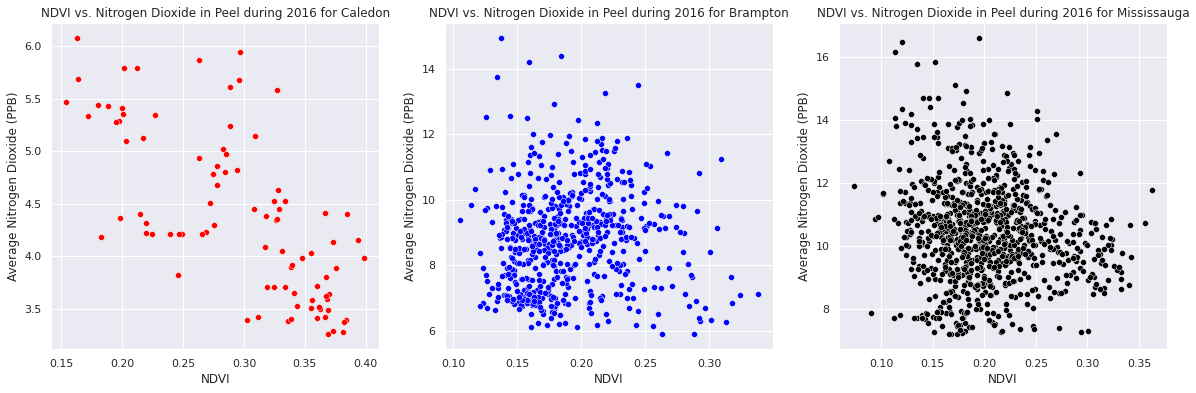

In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,
                                      ncols=3,
                                      figsize=(20, 6));

sns.scatterplot(ax = ax0, data = caledon_df, x = 'mean', y = 'APMean', color = 'red')
ax0.set_title('NDVI vs. Nitrogen Dioxide in Peel during 2016 for Caledon')
ax0.set_xlabel('NDVI')
ax0.set_ylabel('Average Nitrogen Dioxide (PPB)')

sns.scatterplot(ax = ax1, data = brampton_df, x = 'mean', y = 'APMean', color = 'blue')
ax1.set_title('NDVI vs. Nitrogen Dioxide in Peel during 2016 for Brampton')
ax1.set_xlabel('NDVI')
ax1.set_ylabel('Average Nitrogen Dioxide (PPB)')

sns.scatterplot(ax = ax2, data = sauga_df, x = 'mean', y = 'APMean', color = 'black')
ax2.set_title('NDVI vs. Nitrogen Dioxide in Peel during 2016 for Mississauga')
ax2.set_xlabel('NDVI')
ax2.set_ylabel('Average Nitrogen Dioxide (PPB)');

# **Spatial Autocorrelation of NO$_{2}$ - Moran's I**

In [ ]:
# Spatial Weights
wq = lps.weights.KNN.from_dataframe(peel_2016_df, k=5)

# Row-Standardization
wq.transform = 'r'

# Spatial Lag of Nitrogen Dioxide Data
peel_2016_df['APMean'] = lps.weights.lag_spatial(wq, peel_2016_df['APMean'])

# Moran's I of Nitrogen Dioxide
y = peel_2016_df.APMean
moran = Moran(y, wq)
moran.I

0.9722849346038631

# **Spatial Regression Modeling - Spatially Lagged Regression**

In [ ]:
# Create weights
w_ndvi = weights.KNN.from_dataframe(peel_2016_df, k = 5)

# Assign spatial lag based on the pool values
lagged = peel_2016_df.assign(w_ndvi = weights.spatial_lag.lag_spatial(w_ndvi, peel_2016_df['mean'].values))
lagged.head(5)

,OBJECTID,DAUID,PRUID_x,PRNAME_x,CDUID_x,CDNAME_x,CDTYPE_x,CCSUID_x,CCSNAME_x,CSDUID_x,...,CMAPUID_y,CMANAME_y,CMATYPE_y,CTUID_y,CTNAME_y,ADAUID_y,APMean,mean,log_ndvi,w_ndvi
0,4055,35211603,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,35535,Toronto,B,5350585.07,585.07,35210001,3.493194,0.368592,-0.998062,1.737579
1,4067,35211604,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,35535,Toronto,B,5350585.07,585.07,35210001,3.496860,0.383406,-0.958658,1.851904
2,4092,35210014,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,35535,Toronto,B,5350586.01,586.01,35210009,4.359996,0.326539,-1.119204,1.639907
3,4093,35210015,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,35535,Toronto,B,5350586.02,586.02,35210009,4.729793,0.317828,-1.146242,1.695097
4,4094,35210017,35,Ontario,3521,Peel,RM,3521024,Caledon,3521024,...,35535,Toronto,B,5350586.02,586.02,35210009,4.397848,0.384662,-0.955388,1.812242


In [ ]:
# Spatially Lagged Regression Model
sp_lag_reg = spreg.OLS(lagged[['APMean']].values, lagged[['w_ndvi']].values)
print(sp_lag_reg.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :     dep_var                Number of Observations:        1650
Mean dependent var  :      9.4461                Number of Variables   :           2
S.D. dependent var  :      1.9640                Degrees of Freedom    :        1648
R-squared           :      0.0733
Adjusted R-squared  :      0.0728
Sum squared residual:    5894.602                F-statistic           :    130.3800
Sigma-square        :       3.577                Prob(F-statistic)     :   4.074e-29
S.E. of regression  :       1.891                Log likelihood        :   -3391.690
Sigma-square ML     :       3.572                Akaike info criterion :    6787.379
S.E of regression ML:      1.8901                Schwarz criterion     :    6798.196

-----------------------------------------------------------------------------

# **Machine Learning**

In [ ]:
# Split the data into X and y
X = peel_2016_df['mean']

y = peel_2016_df['APMean']

In [ ]:
# Set random seed for consistency and reproducibility
np.random.seed(42)

# Split data into train & sets
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

# Sizes of test & training sets
# Sizes of test & training sets
print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is: ", X_test.shape)
print("The shape of y_train is:", y_train.shape)
print("The shape of y_test is: ", y_test.shape)

The shape of X_train is: (1320,)
The shape of X_test is:  (330,)
The shape of y_train is: (1320,)
The shape of y_test is:  (330,)


In [ ]:
# Converting Predictor and Target into NumPy Arrays for Scikit-Learn
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
# Reshaping NumPy Arrays to Train and Test Models in Scikit-Learn (Only 1 Predictor)
X_train= X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [ ]:
# Models
models = {"Lasso": Lasso(),
          "Elastic Net": ElasticNet(),
          "KNN Regressor": KNeighborsRegressor(),
          "SVR": SVR(),
          "Gradient Boost": GradientBoostingRegressor(),
          "Random Forest": RandomForestRegressor(),}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning mdoels.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data
    X_test: testing data
    y_train: labels associated with training data
    y_test: labels associated with test data
    """
    # Random seed for consistent and reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
# Obtain scores for models
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

{'Lasso': -2.074956135356132e-06,
 'Elastic Net': -2.074956135356132e-06,
 'KNN Regressor': -0.09390796182420158,
 'SVR': 0.0654644531460028,
 'Gradient Boost': 0.03155893080328198,
 'Random Forest': -0.37183755396614115}

In [ ]:
# Put standardized models into dataframe for comparison
model_compare = pd.DataFrame(model_scores, index = ["R^2"])
model_compare

,Lasso,Elastic Net,KNN Regressor,SVR,Gradient Boost,Random Forest
R^2,-0.000002,-0.000002,-0.093908,0.065464,0.031559,-0.371838


                                                      Model Comparison:                                                      
                                               _______________________________                                               


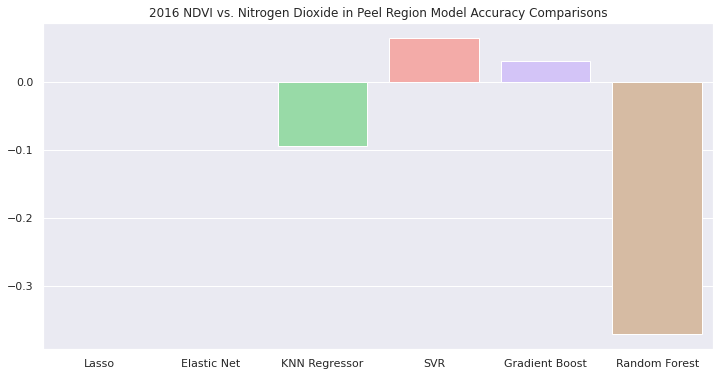

In [ ]:
# Visualize model results
# Title for Model Comparison Bar Plot
title_graph = "Model Comparison:"
centered_title = title_graph.center(125)
underline = "_______________________________"
centered_underline = underline.center(125)
print(centered_title)
print(centered_underline)

# Plot model results
plt.figure(figsize = (12, 6))
model_compare_plot = sns.barplot(data = model_compare)
plt.title('2016 NDVI vs. Nitrogen Dioxide in Peel Region Model Accuracy Comparisons');